In [1]:
import numpy as np
import pandas as pd

In [2]:
D4AI_list = pd.read_excel('Global_call_invite.xls')

In [3]:
D4AI_list.head()

,Name,Studio,Email,Notes,Call Lead,Unnamed: 5,Point on Postcard
0,Axel Unger,Munich,aunger@ideo.com,NaN,x,NaN,NaN
1,Andrea Rabinelli,Munich,arabinelli@ideo.com,NaN,NaN,NaN,NaN
2,David Sjunnesson,Munich,dsjunnesson@ideo.com,NaN,x,NaN,NaN
3,Katrin Klausecker,Munich,kklausecker@ideo.com,NaN,NaN,NaN,NaN
4,Jure Martinec,Munich,jmartinec@ideo.com,NaN,x,NaN,x


In [4]:
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=100
D4AI_list.head()

,Name,Studio,Email,Notes,Call Lead,Unnamed: 5,Point on Postcard,number_of_meetings,max_meetings
0,Axel Unger,Munich,aunger@ideo.com,NaN,x,NaN,NaN,0,100
1,Andrea Rabinelli,Munich,arabinelli@ideo.com,NaN,NaN,NaN,NaN,0,100
2,David Sjunnesson,Munich,dsjunnesson@ideo.com,NaN,x,NaN,NaN,0,100
3,Katrin Klausecker,Munich,kklausecker@ideo.com,NaN,NaN,NaN,NaN,0,100
4,Jure Martinec,Munich,jmartinec@ideo.com,NaN,x,NaN,x,0,100


In [5]:
leads = D4AI_list[D4AI_list['Call Lead']=='x']

In [6]:
leads['Studio'].value_counts()

Palo Alto        5
San Francisco    5
London           3
Munich           3
Cambridge        3
Shanghai         1
New York         1
Tokyo            1
Name: Studio, dtype: int64

In [7]:
studios = set(D4AI_list['Studio'].values)
studios

{'Cambridge',
 'London',
 'Munich',
 'New York',
 'Palo Alto',
 'San Francisco',
 'Shanghai',
 'Tokyo'}

In [8]:
hours_diff = pd.read_csv('time_zones.csv')
hours_diff

,Studio,hours_diff
0,Munich,7
1,London,6
2,Shanghai,13
3,Tokyo,14
4,Palo Alto,-2
5,San Francisco,-2
6,Cambridge,1
7,New York,1


In [9]:
(hours_diff['hours_diff'] + 9)%24

0    16
1    15
2    22
3    23
4     7
5     7
6    10
7    10
Name: hours_diff, dtype: int64

In [10]:
possible_groups = []

full_df = []

for i in range(24):
    times = (hours_diff['hours_diff'] + i)%24
    
    #get the ones that are within working hours
    working_hours_bool = (times>8) & (times<18)
    working_studios = hours_diff[working_hours_bool]
    working_studios['time'] = times[working_hours_bool]
#     print(working_studios)
#     print(' ')
    possible_groups.append(frozenset(working_studios['Studio']))
    full_df.append(working_studios)

/Users/lisa/.pyenv/versions/paired-lunch/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
studio_pairings = set(possible_groups)

In [12]:
studio_pairings

{frozenset({'Shanghai', 'Tokyo'}),
 frozenset({'Cambridge', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'London', 'Munich'}),
 frozenset({'London', 'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Palo Alto', 'San Francisco', 'Tokyo'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Palo Alto', 'San Francisco'}),
 frozenset({'Cambridge', 'London', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'Cambridge', 'London', 'Munich', 'New York'})}

In [13]:
actual_groups = []
for group in studio_pairings:
    if len(group)>2:
        actual_groups.append(group)

In [14]:
actual_groups

[frozenset({'Cambridge', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Palo Alto', 'San Francisco', 'Tokyo'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'London', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'Cambridge', 'London', 'Munich', 'New York'})]

In [15]:
mapping_dict = {}
# for group in actual_groups:
#     for entry in group:

for studio in studios:
    if studio not in mapping_dict:
        mapping_dict[studio] = []
    for group in actual_groups:
        if studio in group:
            group = np.array([stud for stud in group])
            group = group[group!=studio]
            current_list = mapping_dict[studio]
            for entry in group:
                current_list.append(entry)
            mapping_dict[studio] = current_list

In [16]:
poss = {}
for studio in mapping_dict:
    matches = mapping_dict[studio]
    possibilities = set(matches)
    poss[studio] = possibilities

In [17]:
poss

{'Cambridge': {'London', 'Munich', 'New York', 'Palo Alto', 'San Francisco'},
 'London': {'Cambridge',
  'Munich',
  'New York',
  'Palo Alto',
  'San Francisco',
  'Shanghai',
  'Tokyo'},
 'Munich': {'Cambridge', 'London', 'New York', 'Shanghai', 'Tokyo'},
 'New York': {'Cambridge', 'London', 'Munich', 'Palo Alto', 'San Francisco'},
 'Palo Alto': {'Cambridge', 'London', 'New York', 'San Francisco', 'Tokyo'},
 'San Francisco': {'Cambridge', 'London', 'New York', 'Palo Alto', 'Tokyo'},
 'Shanghai': {'London', 'Munich', 'Tokyo'},
 'Tokyo': {'London', 'Munich', 'Palo Alto', 'San Francisco', 'Shanghai'}}

In [18]:
actual_groups

[frozenset({'Cambridge', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Palo Alto', 'San Francisco', 'Tokyo'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'London', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'Cambridge', 'London', 'Munich', 'New York'})]

In [19]:
from itertools import combinations

In [20]:
comb = set(combinations(studios, 3))
comb 

{('Cambridge', 'Munich', 'New York'),
 ('Cambridge', 'Munich', 'Palo Alto'),
 ('Cambridge', 'Munich', 'San Francisco'),
 ('Cambridge', 'Munich', 'Tokyo'),
 ('Cambridge', 'New York', 'Palo Alto'),
 ('Cambridge', 'New York', 'San Francisco'),
 ('Cambridge', 'New York', 'Tokyo'),
 ('Cambridge', 'Palo Alto', 'San Francisco'),
 ('Cambridge', 'Palo Alto', 'Tokyo'),
 ('Cambridge', 'Shanghai', 'Munich'),
 ('Cambridge', 'Shanghai', 'New York'),
 ('Cambridge', 'Shanghai', 'Palo Alto'),
 ('Cambridge', 'Shanghai', 'San Francisco'),
 ('Cambridge', 'Shanghai', 'Tokyo'),
 ('Cambridge', 'Tokyo', 'San Francisco'),
 ('London', 'Cambridge', 'Munich'),
 ('London', 'Cambridge', 'New York'),
 ('London', 'Cambridge', 'Palo Alto'),
 ('London', 'Cambridge', 'San Francisco'),
 ('London', 'Cambridge', 'Shanghai'),
 ('London', 'Cambridge', 'Tokyo'),
 ('London', 'Munich', 'New York'),
 ('London', 'Munich', 'Palo Alto'),
 ('London', 'Munich', 'San Francisco'),
 ('London', 'Munich', 'Tokyo'),
 ('London', 'New York',

In [21]:
# check if any of those are in the actual groups
good_groups = []
for entry in comb:
    entry = frozenset(entry)
    for group in actual_groups:
        if entry.issubset(group):
            good_groups.append(entry)
good_groups = set(good_groups)

In [22]:
good_groups

{frozenset({'Cambridge', 'New York', 'Palo Alto'}),
 frozenset({'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'Shanghai', 'Tokyo'}),
 frozenset({'Cambridge', 'London', 'Palo Alto'}),
 frozenset({'London', 'New York', 'San Francisco'}),
 frozenset({'Cambridge', 'Munich', 'New York'}),
 frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Cambridge', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'New York', 'Palo Alto'}),
 frozenset({'Palo Alto', 'San Francisco', 'Tokyo'}),
 frozenset({'London', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'Munich', 'Tokyo'}),
 frozenset({'Cambridge', 'London', 'New York'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'London', 'Munich'}),
 frozenset({'London', 'Munich', 'New York'}),
 frozenset({'Cambridge', 'New York', 'San Francisco'}),
 frozenset({'Cambridge', 'London', 'San Francisco'})}

In [23]:
leads = D4AI_list[D4AI_list['Call Lead']=='x']
weight = leads['max_meetings'] - leads['number_of_meetings']
selection = leads.sample(1, weights = weight)

selection_studio = selection.Studio.values[0]
selection_email = [selection.Email.values[0]]


In [24]:
leads = D4AI_list[D4AI_list['Call Lead']=='x']
weight = leads['max_meetings'] - leads['number_of_meetings']
selection = leads.sample(1, weights = weight)

selection_studio = selection.Studio.values[0]
selection_email = [selection.Email.values[0]]

possibilities = []
for group in good_groups:
    if selection_studio in group:
        possibilities.append(group)

In [25]:
import random
selected = []
while (sum(D4AI_list.number_of_meetings < 1) > 0):
    leads = D4AI_list[D4AI_list['Call Lead']=='x']
    weight = leads['max_meetings'] - leads['number_of_meetings']
    selection = leads.sample(1, weights = weight**5)

    selection_studio = selection.Studio.values[0]
    selection_email = [selection.index[0]]

   
    studio_group_index = random.randint(0, len(possibilities)-1)
    studio_group = possibilities[studio_group_index]
    other_studios = set(studio_group) - set([selection_studio])
    other_call_members = []
    for studio in other_studios:
        people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
        weight = people['max_meetings'] - people['number_of_meetings']
        if sum(weight) == 0:
            people = D4AI_list[((D4AI_list.Studio == studio))]
            weight = people['max_meetings'] - people['number_of_meetings']
            # pick different studio grouping
            bad_studio_group_index = studio_group_index
            while studio_group_index == bad_studio_group_index:
                studio_group_index = random.randint(0, len(possibilities)-1)
                studio_group = possibilities[studio_group_index]
                other_studios = set(studio_group) - set([selection_studio])
                print('make new selection', other_studios)
                for studio in other_studios:
                    people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
                    weight = people['max_meetings'] - people['number_of_meetings']
                
            
        selection = people.sample(1, weights = weight**7)
        selection_email.append(selection.index[0])
    print(selection_email)
    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)

[26, 43, 57]
[26, 15, 47]
[56, 70, 9]
[12, 8, 23]
[44, 68, 35]
[59, 32, 42]
[59, 70, 28]
[48, 68, 36]
[29, 69, 45]
[25, 70, 52]
[17, 68, 9]
[25, 49, 60]
[0, 13, 23]
[48, 28, 66]
[44, 35, 22]
[12, 69, 30]
[53, 13, 31]
[29, 41, 23]
[2, 70, 11]
[26, 68, 11]
[24, 20, 13]
[59, 35, 45]
[27, 13, 42]
[53, 69, 16]
[59, 15, 43]
[4, 70, 13]
[14, 8, 22]
[2, 21, 23]
[37, 16, 61]
[17, 46, 52]
[71, 33, 63]
[17, 21, 1]
[71, 13, 30]
[4, 70, 51]
[44, 69, 28]
[12, 69, 62]
[19, 15, 23]
[71, 1, 67]
[37, 33, 22]
[0, 18, 23]
[38, 15, 36]
[0, 15, 52]
[25, 69, 64]
[0, 69, 66]
[26, 16, 45]
[19, 15, 23]
[25, 69, 62]
[59, 70, 39]
[59, 16, 41]
[29, 13, 63]
[37, 68, 11]
[4, 11, 22]
[38, 13, 33]
[14, 31, 54]
[19, 15, 8]
[34, 68, 11]
[53, 11, 33]
[37, 16, 65]
[24, 18, 7]
[24, 21, 11]
[4, 11, 57]
[48, 69, 13]
[17, 33, 61]
[17, 18, 8]
[12, 21, 3]
[24, 13, 10]
[40, 28, 62]
[38, 15, 33]
[0, 15, 66]
[2, 70, 13]
[53, 28, 42]
[37, 69, 57]
[40, 68, 11]
[38, 69, 15]
[27, 13, 58]
[53, 70, 6]
[53, 68, 1]
[53, 68, 47]
[27, 68, 1

In [26]:
D4AI_list['number_of_meetings'].sum()

510

In [107]:
# go through leads and assign groups for them, see how that turns out
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=5
D4AI_list.head()

,Name,Studio,Email,Notes,Call Lead,Unnamed: 5,Point on Postcard,number_of_meetings,max_meetings
0,Axel Unger,Munich,aunger@ideo.com,NaN,x,NaN,NaN,0,5
1,Andrea Rabinelli,Munich,arabinelli@ideo.com,NaN,NaN,NaN,NaN,0,5
2,David Sjunnesson,Munich,dsjunnesson@ideo.com,NaN,x,NaN,NaN,0,5
3,Katrin Klausecker,Munich,kklausecker@ideo.com,NaN,NaN,NaN,NaN,0,5
4,Jure Martinec,Munich,jmartinec@ideo.com,NaN,x,NaN,x,0,5


In [53]:
import random
selected = []
for index, selection in leads.iterrows():
    percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
    
    selection_studio = selection.Studio
    selection_email = [index]

    possibilities = []
    for group in good_groups:
        if selection_studio in group:
            possibilities.append(group)
            
    studio_group_index = random.randint(0, len(possibilities)-1) # weight this somehow
    studio_group = possibilities[studio_group_index]
    other_studios = set(studio_group) - set([selection_studio])
    other_call_members = []
    for studio in other_studios:
        people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
        weight = people['max_meetings'] - people['number_of_meetings']
        if sum(weight) == 0:
            people = D4AI_list[((D4AI_list.Studio == studio))]
            weight = people['max_meetings'] - people['number_of_meetings']
            # pick different studio grouping
            bad_studio_group_index = studio_group_index
            while studio_group_index == bad_studio_group_index:
                studio_group_index = random.randint(0, len(possibilities)-1)
                studio_group = possibilities[studio_group_index]
                other_studios = set(studio_group) - set([selection_studio])
                print('make new selection', other_studios)
                for studio in other_studios:
                    people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
                    weight = people['max_meetings'] - people['number_of_meetings']
                
            
        selection = people.sample(1, weights = weight**7)
        selection_email.append(selection.index[0])
    print(selection_email)
    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)

[0, 70, 51]
[2, 18, 22]
[4, 21, 16]
[12, 8, 23]
[14, 20, 23]
[17, 21, 22]
[19, 15, 3]
[24, 20, 9]
[25, 69, 50]
[26, 11, 43]
[27, 68, 64]
[29, 68, 13]
[34, 11, 41]
[37, 69, 16]
[38, 32, 22]
[40, 15, 65]
[44, 68, 35]
[48, 70, 55]
[53, 70, 10]
[56, 68, 31]
[59, 16, 30]
[71, 35, 67]


In [269]:
def find_weight_for_studio_trio(trio, D4AI_list):
    
    total_weight = 0
    maxed = 1
    
    percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_zero.fillna(0, inplace=True)
    
    percentage_max = D4AI_list[D4AI_list['number_of_meetings']==D4AI_list['max_meetings']].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_max.fillna(0, inplace=True)
    

    for studio in trio:
        p_zero = percentage_zero.loc[studio] #percentage people with zero meetings
        if percentage_max[studio]>=1:
            maxed = 0
        total_weight += p_zero
    return total_weight*maxed

In [271]:
percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
percentage_zero.fillna(0, inplace=True)
percentage_zero

Cambridge        1.0
San Francisco    1.0
Palo Alto        1.0
Munich           1.0
London           1.0
Shanghai         1.0
New York         1.0
Tokyo            1.0
Name: Studio, dtype: float64

In [238]:
#what if we go through the people, then select the lead?

In [332]:
import random
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=3
D4AI_list.head()

non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
leads = D4AI_list[(D4AI_list['Call Lead']=='x')]

selected = []
for index, selection in leads.iterrows():
    selection_studio = selection.Studio
    selection_email = [index]
    print('selection studio', selection_studio)
    print('selection email ', selection_email)
    
    non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
    leads = D4AI_list[(D4AI_list['Call Lead']=='x')]

    possibilities = []
    weights = []
    for group in good_groups:
        if selection_studio in group:
            possibilities.append(group)
            weights.append(100*find_weight_for_studio_trio(group, non_leads))
            
    weights = np.array(weights)
    studio_group = pd.DataFrame({'col':possibilities}).sample(weights=weights**10).values[0][0]
    print(pd.DataFrame({'col':possibilities}).sample(weights=np.array(weights)))
    print(' ')
    other_studios = set(studio_group) - set([selection_studio])

    for studio in other_studios:
        #print('studio', studio)
        #people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
        people = non_leads[non_leads.Studio==studio]
        weight = (people['max_meetings'] - people['number_of_meetings'])**10

        people['weights'] = weight
        # print(people[people.number_of_meetings>0])
        # print(' ')
        selection = people.sample(1, weights = weight)
        selection_email.append(selection.index[0])

    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)

selection studio Munich
selection email  [0]
                         col
1  (Shanghai, Munich, Tokyo)
 
selection studio Munich
selection email  [2]
                             col
0  (New York, Munich, Cambridge)
 


/Users/lisa/.pyenv/versions/paired-lunch/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


selection studio Munich
selection email  [4]
                       col
2  (London, Tokyo, Munich)
 
selection studio London
selection email  [12]
                          col
7  (Shanghai, London, Munich)
 
selection studio London
selection email  [14]
                                   col
10  (London, Cambridge, San Francisco)
 
selection studio London
selection email  [17]
                       col
5  (London, Tokyo, Munich)
 
selection studio Shanghai
selection email  [19]
                          col
2  (Shanghai, London, Munich)
 
selection studio Tokyo
selection email  [24]
                                 col
2  (Palo Alto, San Francisco, Tokyo)
 
selection studio Palo Alto
selection email  [25]
                                 col
5  (Palo Alto, San Francisco, Tokyo)
 
selection studio Palo Alto
selection email  [26]
                              col
2  (London, Cambridge, Palo Alto)
 
selection studio Palo Alto
selection email  [27]
                                  col
6

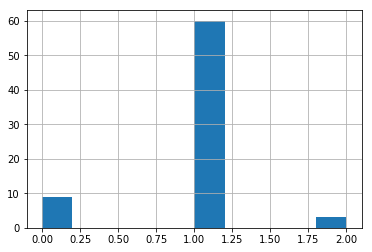

In [316]:
D4AI_list['number_of_meetings'].hist()

In [317]:
D4AI_list['number_of_meetings'].value_counts()

1    60
0     9
2     3
Name: number_of_meetings, dtype: int64

In [318]:
D4AI_list[D4AI_list['number_of_meetings']==0]

,Name,Studio,Email,Notes,Call Lead,Unnamed: 5,Point on Postcard,number_of_meetings,max_meetings
5,Akshan Ish,Munich,aish@ideo.com,Dean was less sure they should be included,?,NaN,NaN,0,3
9,Franz Blach,Munich,fblach@ideo.com,NaN,NaN,NaN,NaN,0,3
18,Tony Wong,Shanghai,twong@ideo.com,NaN,NaN,NaN,NaN,0,3
21,Momo Estrella,Shanghai,mestrella@ideo.com,Momo is interested in doing D4AI work on Shang...,NaN,NaN,NaN,0,3
39,Jen Panasik,San Francisco,jpanasik@ideo.com,NaN,NaN,NaN,NaN,0,3
42,Ilya Prokopoff,San Francisco,iprokopoff@ideo.com,NaN,NaN,NaN,NaN,0,3
49,Rebecca Lee,San Francisco,rlee@ideo.com,NaN,NaN,NaN,NaN,0,3
52,Michael Hendrix,Cambridge,mhendrix@ideo.com,Maybe later,NaN,NaN,NaN,0,3
63,Nick Dupey,Cambridge,ndupey@ideo.com,NaN,NaN,NaN,NaN,0,3


In [375]:
def find_weight_for_studio_trio(trio, D4AI_list):
    
    total_weight = 0
    maxed = 1
    
    percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_zero.fillna(0, inplace=True)
    
    percentage_max = D4AI_list[D4AI_list['number_of_meetings']==D4AI_list['max_meetings']].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_max.fillna(0, inplace=True)

    for studio in trio:
        p_zero = percentage_zero.loc[studio] #percentage people with zero meetings
        if percentage_max[studio]>=1:
            maxed = 0
        total_weight += p_zero
    return total_weight*maxed

def find_possible_studios(selection_studio, good_groups):
    possibilities = []
    weights = []
    for group in good_groups:

        if selection_studio in group:
            possibilities.append(group)
            weights.append(100*find_weight_for_studio_trio(group, non_leads))
            
    weights = np.array(weights)
    return possibilities, weights


In [382]:
import random
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=3
D4AI_list.head()

non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
leads = D4AI_list[(D4AI_list['Call Lead']=='x')]

selected = []
while (sum(D4AI_list.number_of_meetings < 1) > 0):
    non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
    leads = D4AI_list[(D4AI_list['Call Lead']=='x')]
    weights = [0,0]
    
    while (sum(weights)==0):
        weight = (leads['max_meetings'] - leads['number_of_meetings'])**15
        selection = leads.sample(1, weights = weight)

        selection_studio = selection.Studio.values[0]
        selection_email = [selection.index[0]]

        possibilities, weights = find_possible_studios(selection_studio, good_groups)

    studio_group = pd.DataFrame({'col':possibilities}).sample(weights=weights**10).values[0][0]
    other_studios = set(studio_group) - set([selection_studio])

    for studio in other_studios:
        people = non_leads[non_leads.Studio==studio]
        weight = (people['max_meetings'] - people['number_of_meetings'])**15

        people['weights'] = weight
        selection = people.sample(1, weights = weight)
        selection_email.append(selection.index[0])
    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)

/Users/lisa/.pyenv/versions/paired-lunch/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


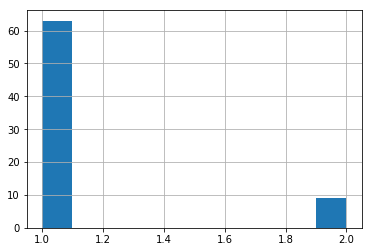

In [383]:
D4AI_list['number_of_meetings'].hist()